# Malaria EDA
In 2017, 435000 people died from malaria worldwide, making it one of the world's leading causes of deaths. In this notebook, I look at the overall numbers of malaria and the trend in estimated cases across different regions between the years 2000 and 2017, focusing on the African continent. I then look at how the incidence of cases compares with malaria funding, distributed Insecticide Treated Nets (ITNs) and weather conditions. 

### Insights

- Sub-Saharan Africa makes up 91.5% of worldwide cases of malaria, but just 14% of the world's population    
- 25% of cases worldwide occur in Nigeria  
- Over one third of cases worldwide occur in just two countries: Nigeria and the Democratic Republic of Congo (DRC) and 50% of all cases are shared between just 5 countries: Nigeria, DRC, Mozambique, India and Uganda  

- The incidence of malaria transmission is highest in Africa and the Western Pacific, while the highest absolute number of cases occurs in Africa and Southeast Asia    
- Western Africa is the most effected region in Africa, having the highest incidence of malaria   
- Rwanda has the highest rate of malaria transmission. Almost 50% of people living in 'at risk' areas in Rwanda were infected in 2018    

- 2018 saw a 31% drop in funding per capita in Africa  
- Even with a drop in funding, the average incidence rate in Africa continued to decline in 2018  

- There is no strong correlation between weather conditions and the estimated incidence of malaria, suggesting other factors play a much stronger role   

For information on how the data was collected and cleaned, please see Malaria_DataCleaning.ipynb in the same repository. Data was collected and compiled from multiple sources:

World Health Organisation (WHO) (malaria Cases https://www.who.int/data/gho/data/themes/malaria)   
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 
(Funding and ITNs https://www.who.int/publications/i/item/9789241565721)  
World Weather Online  (Weather Conditions www.worldweatheronline.com accessed with API key)  
Berkeley Earth (Global Temperatures http://berkeleyearth.org/archive/data/)  
Global Fund (Funding and ITNs https://data.theglobalfund.org)  
World Bank (Population and Exchange Rates https://data.worldbank.org/)

All the data above is openly available, except for the data from *World Weather Online*. See my repository called 'Weather API' for more information on how to access these files. Data from the *World Health Organisation* was available up until 2018. 

First, I read in the necessary libraries. For the graphs in this notebook, I used the Plotly and Matplotlib libraries.

In [1]:
import plotly.express as px
from matplotlib import pyplot as plt
import pandas as pd

Below I import another notebook, where I read in, cleaned and prepared the data.

In [2]:
%run Malaria_DataCleaning.ipynb

## Total Cases of Malaria
As we can see from the pie chart below, 91.5% of worldwide cases of malaria occurred in Africa* in 2017. Considering Africa only makes up 17% of the world's population, with the Sub-Saharan region even less, this is a disproportionately large number. The next region to be effected is Southeast Asia with just above 5% of all cases, with the Eastern Mediterranean following with 2% of cases. 

**In this case, WHO defines the African region differently to the African Union and mainly includes countries in Sub-Saharan Africa. For a list of countries with their corresponding WHO region, please see countries.csv in the 'Data' folder.*

Using Plotly, I first defined the type of plot as a pie chart and then fed it my dataframe, the column of values to plot and the column of categories (names) to consider. 

In [3]:
#Malaria Cases by WHO Region in 2017
fig1 = px.pie(WHO_region, values='2017', names='WHO_Region',
             title='Percentage of Worldwide Cases by WHO Region in 2017')
fig1.write_image("Figures/pie/MalariaCasesPerc2017_WHOregion.jpg")

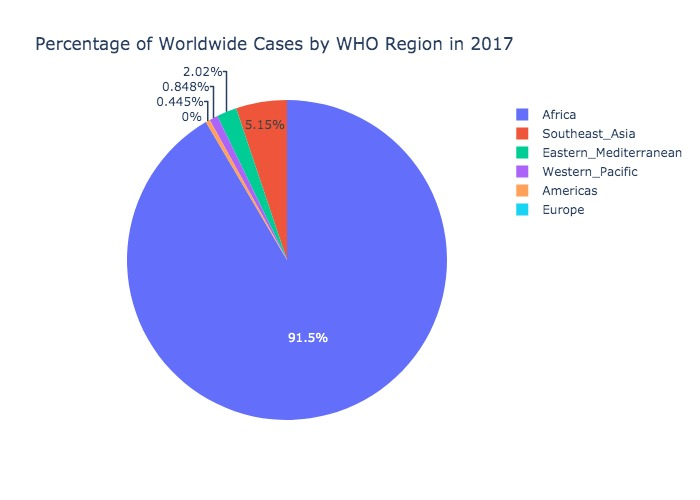

Here I define a bar graph with the dataframe WHO_region_pivot as my main input. Its column 'Year' were the x values and for the y values I fed it a list of column names starting from the second column and up ('2010' to '2017'). I added a title and changed the y axis and legend labels.

In [4]:
#Worldwide Cases by WHO Region
fig2 = px.bar(WHO_region_pivot,
              x='Year',
              y=WHO_region_pivot.columns.tolist()[1:],
              title='Worldwide Cases of Malaria',
              labels={'value':'Malaria Cases (million people)',
                      'variable':'WHO Region'})
fig2.write_image('Figures/bar/MalariaCases2010_2017_WHOregion.jpg')

Below is a bar chart showing the number of estimated cases per WHO defined region between 2010 and 2017. Africa has held the vast majority of these cases in all years shown. After a slow decrease from 2010 to 2016, cases rose in Africa by 5 million cases from 195.5 million in 2016 up to 200.5 million in 2017, an increase of 2.6% within a year. In contrast, cases declined in Africa by 10.9 million from 2010 to 2016 - 5.3% over a 6 year period. 

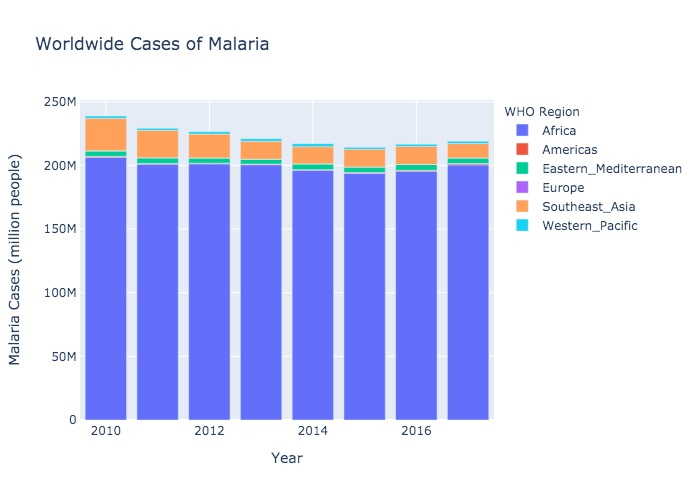

Below I plot the number of malaria cases between 2010 and 2017 as a line for each WHO region. The input 'color' defines the separate categories of lines to plot. The next figure shows the estimated incidence of malaria transmission, how many cases of malaria occur per 1000 people living in areas where malaria is prevalent. While Africa, overall, has recently seen an increase in cases, the rest of the world has either continued to decline or has stayed constant. 

In [5]:
#Worldwide Cases by WHO Region 
fig2a = px.line(WHO_region_melt, x='Year', y='Cases', color='WHO_Region',
                title='Worldwide Cases of Malaria',
                labels={'Cases':'Malaria Cases (million people)',
                        'variable':'WHO Region'})
fig2a.write_image('Figures/line/MalariaCases2010_2017_WHOregion_line.jpg')

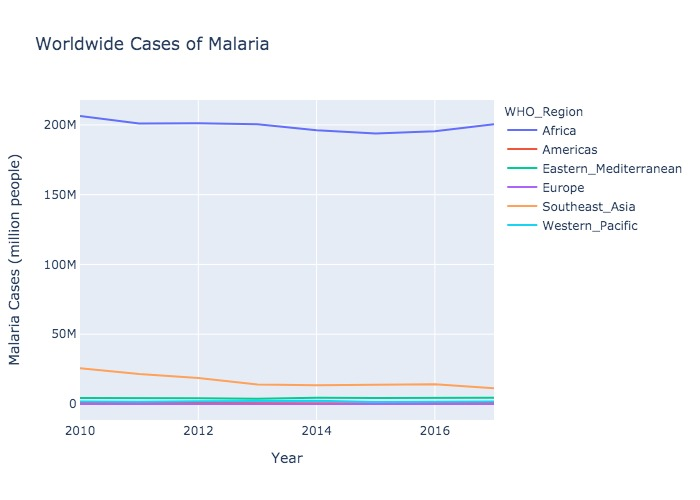

The graph below shows the countries with the highest share of worldwide malaria cases. Nigeria tops the list with almost a quarter of all cases occurring in the country. Over one third of cases comes from just two countries: Nigeria and the Democratic Republic of Congo (DRC). 50% of all cases is shared between 5 countries: Nigeria, DRC, Mozambique, India and Uganda. However, India and Nigeria are also among the most populous nations in the world.

In [6]:
#Countries with highest share of Malaria Cases
fig8 = px.bar(est_cases_top5, x='2017_Perc', y='Country',
              title='Highest Share of Estimated Malaria Cases',
              labels={'2017_Perc':'Percentage of Worldwide Cases (%)',
                      'Country':''
                      })
fig8.write_image('Figures/bar/Highest_Malaria_Cases.jpg')

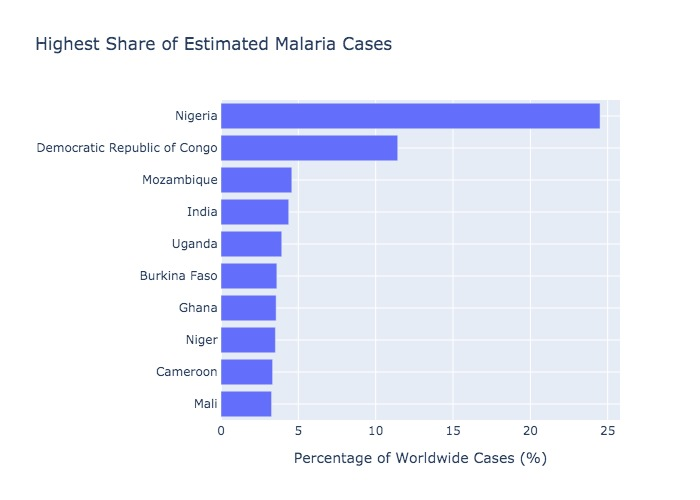

Taking a closer look at Africa, we can see the countries with the highest number of cases to the lowest shown below. Some interesting things stand out. Even though Ghana has half the population of Tanzania, Ghana still has more cases of malaria. South Africa, which has about the same population as Tanzania, has almost no cases. To understand the full picture, we need to look at cases normalized to the population. In this case, the incidence rate of malaria in the population living in 'at risk' areas is a better indicator.

In [7]:
#Estimated cases in African countries 
est_cases_african_countries_df1 = est_cases_african_countries.iloc[:22, :] 
est_cases_african_countries_df2 = est_cases_african_countries.iloc[22:, :].reset_index(drop=True)
count=0
for df in [est_cases_african_countries_df1, est_cases_african_countries_df2]:
    fig6 = px.bar(df, x='2017', y='Country',
                  title='Estimated Cases of Malaria in Africa in 2017', orientation='h',
                  error_x_minus='est_cases_min_2017',
                  error_x='est_cases_max_2017',
                  range_x=[0,80000000],
                  labels={'2017':'Estimated Malaria Cases',
                          'Country':''
                          })
    fig6.update_traces(error_x_color='blue',error_x_thickness=1)
    fig6.write_image('Figures/bar/EstimatedCases_Africa_half{}.jpg'.format(count))
    count+=1

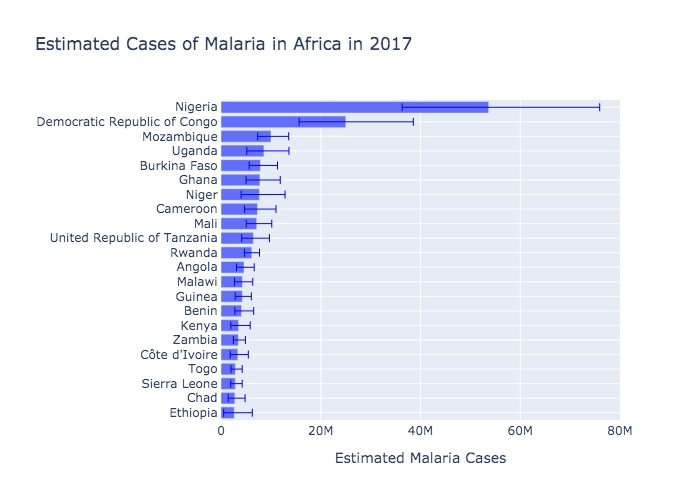

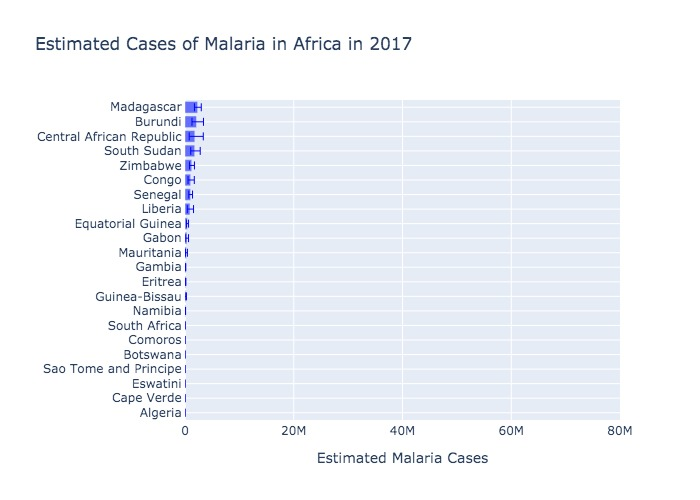

## Incidence of Malaria

The number of malaria cases will change across countries of different population size and there will also be a natural rise in cases over time due to population growth. We can factor out these effects by comparing the rate of malaria transmission rather, which will allow us to identify regions and communities more affected as well as risk factors in those areas.

Below we see the estimated incidence of malaria in African countries in 2018. The modelled data provided by WHO does not include errors, so I will take the numbers at face value here. Rwanda has the highest incidence rate in Africa, at 486 cases per 1000 population at risk in 2018. 49% of people who live in areas of Rwanda where mosquitoes carry malaria, got infected in 2018. Burkina Faso is next with 40%, then Mali (39%) and Benin (39%). 

Breaking the figure down into colour-coded regions, Western African countries are at the top. This region accounts for some of the highest rates of malaria across Africa. Apart from Rwanda, East Africa has low incidence rates, while Southern African countries vary from Botswana with 0.06% to Mozambique with 31%. The North African countries that feature in the data have either a 0% or almost a 0% incidence rate stretching back to 2000. 

In [8]:
#Incidence of malaria in Africa
fig9 = px.bar(inc_cases_africa, x='2018', y='Country', title='Estimated Incidence of Malaria Cases in Africa in 2018',
              color = 'AU_Region', color_discrete_sequence=px.colors.qualitative.Bold,
              orientation='h',
              width=500,
              height=1500,
              labels={
                      '2018':'Incidene of Malaria Cases (Number/1000 population at risk)',
                      'Country':'',
                      'AU_Region':'African Union Region'
                      })
fig9.update_layout(yaxis_categoryorder = 'total ascending')

AU_RegDict={'NA':'Northern Afica','WA':'Western Africa','SA':'Southern Africa',
            'CA':'Central Africa','EA':'Eastern Africa'}
for trace in fig9.data:
    for key,value in AU_RegDict.items():
        if trace.name == key:
            trace.name=value
            break
fig9.write_image('Figures/bar/Inc_Malaria_AfricanCountries.jpg')

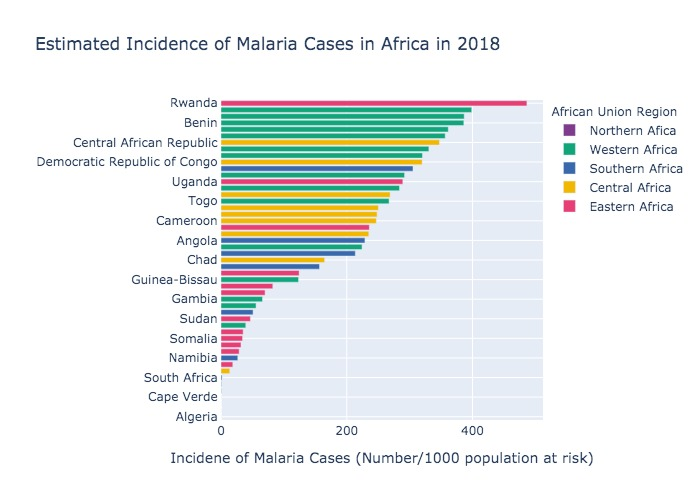

In the figure below, the incidence rate in Africa is high, as probably expected, but it is also high in the Western Pacific. When the population is accounted for, Southeast Asia looks to be in a better position, with malaria occurring in the region at the same rate as the Americas and Eastern Mediterranean regions. The good news is that the rate of malaria transmission between 2000 and 2018 shows on average a steady decline for both Africa and the Western Pacific. 

In [9]:
#Incidence of malaria by WHO Region
fig3 = px.line(inc_cases_region_, x='Year', y='Inc_Cases', color='WHO_Region',
               title='Estimated Incidence of Malaria Cases per 1000 people at risk',
               labels={'Inc_Cases':'Estimated Cases (Number/1000 people at risk)'})
fig3.write_image('Figures/line/Inc_Malaria_WHORegion.jpg')

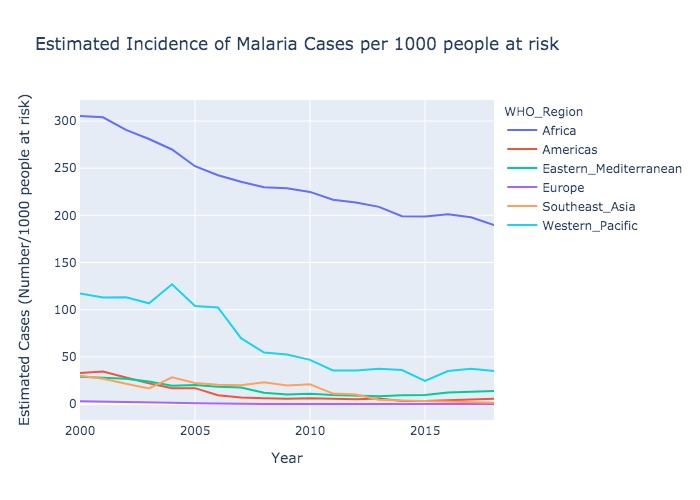

The plot below shows the incidence of malaria for each subregion of Africa from 2000 to 2018. Interestingly, all Sub-Saharan regions have shown similar declines in incidence of malaria since 2000, however, East Africa has risen in recent years.

In [10]:
#Incidence of malaria by AU Region
fig4 = px.line(inc_AU_region, x='Year', y='Inc_Cases',
               title='Incidence of Malaria by African Subregion', color='AU_Region',
               labels={'Inc_Cases':'Malaria Cases (Number/1000 people at risk)'})
fig4.write_image('Figures/line/Inc_Malaria_AURegion.jpg')

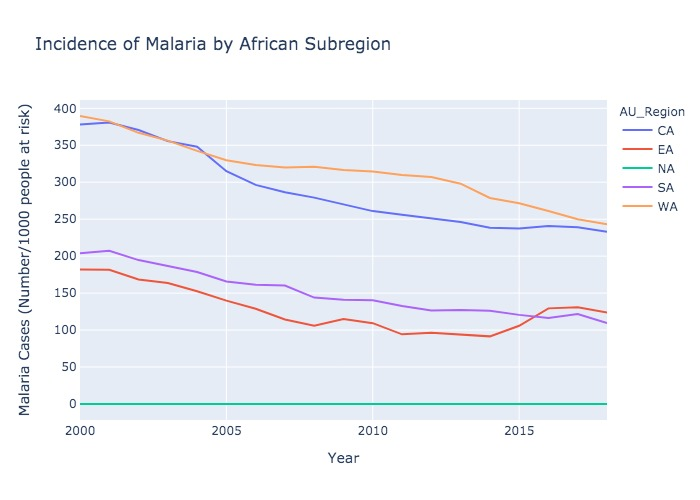

The following code looks at the trends of countries within each African region using Matplotlib.

In [11]:
#Incidence of malaria by selected African region with Matplotlib
plt.ioff() #turn off interactive plotting
inc_years=inc_cases.columns.tolist()[2:]
Africa_REGIONS_name=['SA','EA','CA','NA','WA']
for name in Africa_REGIONS_name:
    plt.figure()
    ax=plt.subplot()
    for index,row in inc_cases_africa.iterrows():
        region = row.values.tolist()[1]
        if region == name:
            y = row.values.tolist()[2:]
            country = row.values.tolist()[0]
            plt.plot(inc_years, y, label=country)
    ax.set_xticks(range(len(inc_years))) 
    ax.set_xticklabels(inc_years, rotation=45)
    ax.set_ylim(ymin=0,ymax=600)
    plt.title('Incidence rate of Malaria in Selected Region ({})'.format(name))
    plt.xlabel('Years')
    plt.ylabel('Malaria Cases (Number/1000 people at risk)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='x-small')
    plt.tight_layout()
    plt.savefig('Figures/line/Selected_Region_{}_matplotlib.jpg'.format(name))
    plt.close("all")

Producing the same plots can be done with Plotly, as shown below. Countries within each region of Africa, as defined by the African Union, are shown below with their corresponding trends in incidence. The plots are broken down into 5 regions: Central Africa (CA), East Africa (EA), Southern Africa (SA), Western Africa (WA) and North Africa (NA).

Some anomalies stand out. The island nation of São Tomé and Príncipe sees a steep drop in incidence from the early 2000s. Rwanda rises sharply from 2011 onwards. Guinea-Bissau has a sharp drop in incidence between 2000 and 2005, going from among the highest to the lowest in the region. Malaria is not prevalent in any of the North African countries included in the data. Some countries seem to have a similar wave like feature over a few years, such as Uganda. It is hard to say whether this is an artifact or a real feature, as I don't have details on the modelling done by WHO. Errors for these incidence rates are also not provided by WHO. 

In [12]:
#Incidence of malaria by selected African region
for name in Africa_REGIONS_name:
    inc_cases_africa_select = inc_cases_africa[inc_cases_africa['AU_Region']==name]
    inc_cases_africa_select = pd.melt(inc_cases_africa_select, id_vars=['Country'], value_vars=years_list_inc,
                                      var_name='Year', value_name='Inc_Cases')
    fig7 = px.line(inc_cases_africa_select, x='Year', y='Inc_Cases', color='Country',
                    title='Incidence rate of Malaria in Selected Region ({})'.format(name),
                    range_y=[0,600], labels={'Inc_Cases':'Malaria Incidence (per 1000 population at risk)'})
    fig7.write_image('Figures/line/Selected_Region_{}.jpg'.format(name))

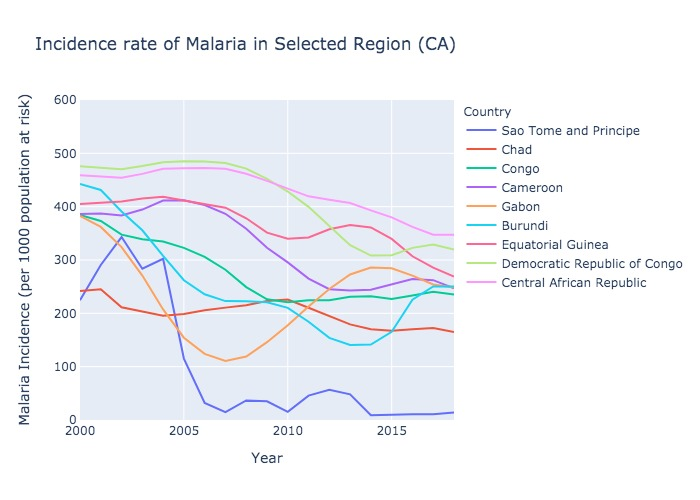

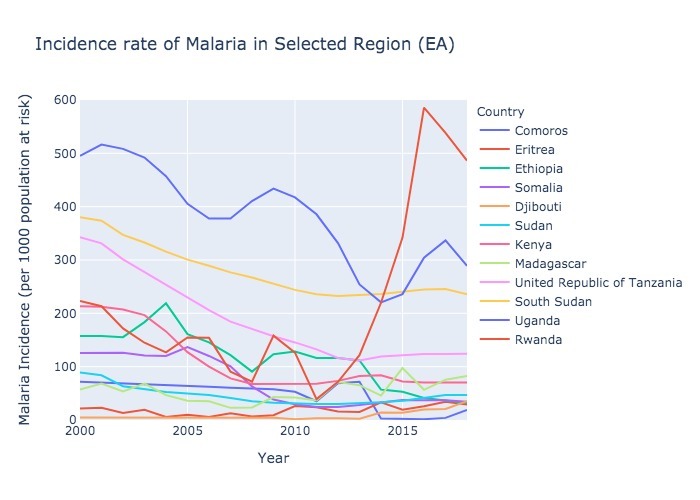

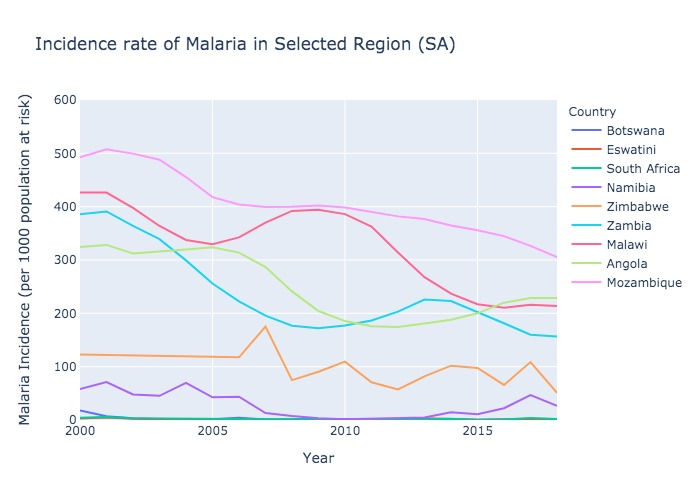

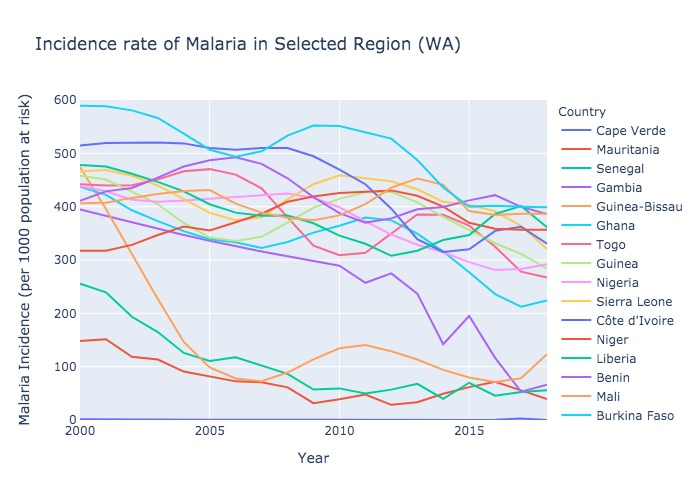

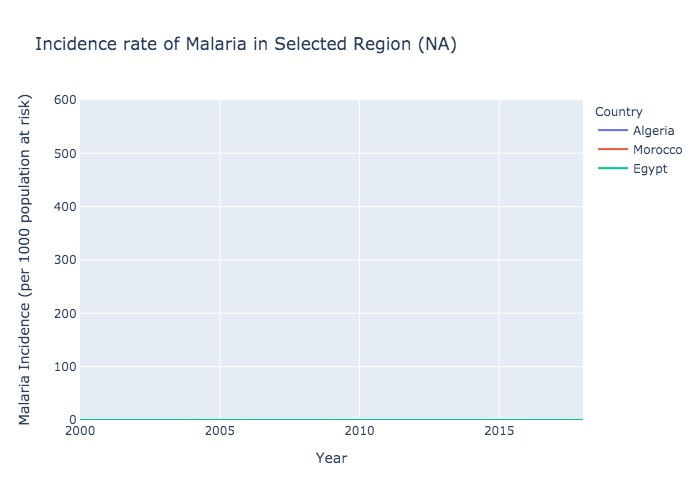

## Funding 

### Overall Funding
As mentioned in the first section, there was a 2.6% increase in malaria cases in Africa from 2016 to 2017, after a slow but steady decline. However, Looking at the total funding in Africa, there was an increase in funding in 2017 of 12% from the previous year. So we see an overall increase in funding but also an increase in the estimated number of cases. To look more closely, we need to factor in population growth.

In [13]:
#Malaria Funding in Africa
Funding_df_total = Funding_df.groupby('Year').sum().reset_index()
fig17 = px.bar(Funding_df_total, x='Year', y='Total_Funding',
              title='Malaria Funding in Africa',
              labels={'Total_Funding':'Malaria Funding (USD)'})
fig17.write_image('Figures/bar/MalariaFunding_2016_2018_AUregion.jpg')

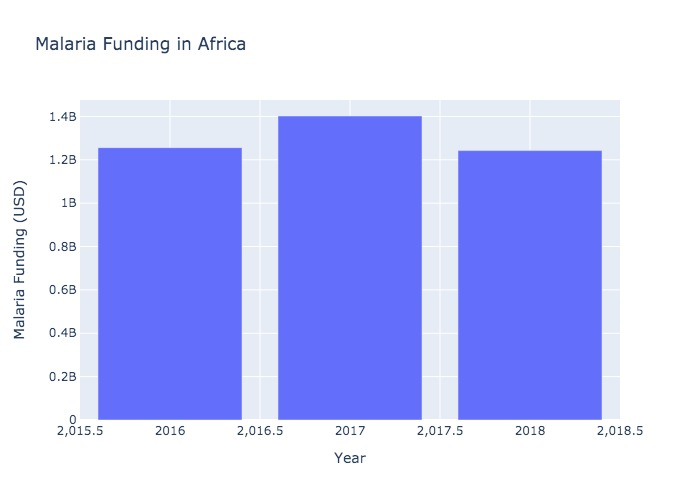

### Funding per Capita
When comparing number of malaria cases with funding, it is necessary to consider a natural rise in cases due to population growth. A better indicator of funding on the ground is funding per capita and comparing this to the incidence rate of malaria cases.

We can see that there was also an increase in funding per capita from US\\$2.2 in 2016 to US\\$2.4 in 2017. There was also a slight decrease in the average incidence of cases across Africa in the same time frame (from 194.4 to 191.6). However, although 2018 saw a 31% drop in funding per capita, the average incidence rate of malaria cases continued to decrease despite this drastic drop.

In [14]:
#Average Funding per Capita 
Funding_Africa_Year = Funding_df.groupby('Year').mean().reset_index()
titles = ['Average Funding per Capita in Africa','Average Incidence of Malaria Cases in Africa']
count=0
for value in ['Funding_per_capita','Inc_Cases']: 
    fig14 = px.bar(Funding_Africa_Year, x='Year', y=value,
                   title=titles[count])
    fig14.write_image('Figures/bar/Funding_{}.jpg'.format(value))
    count+=1

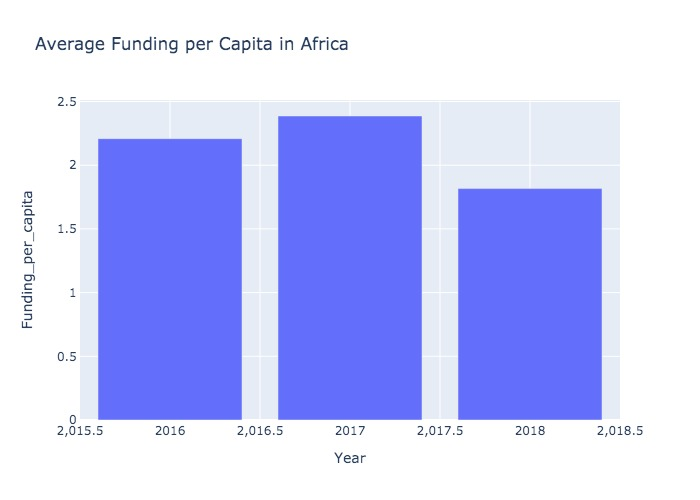

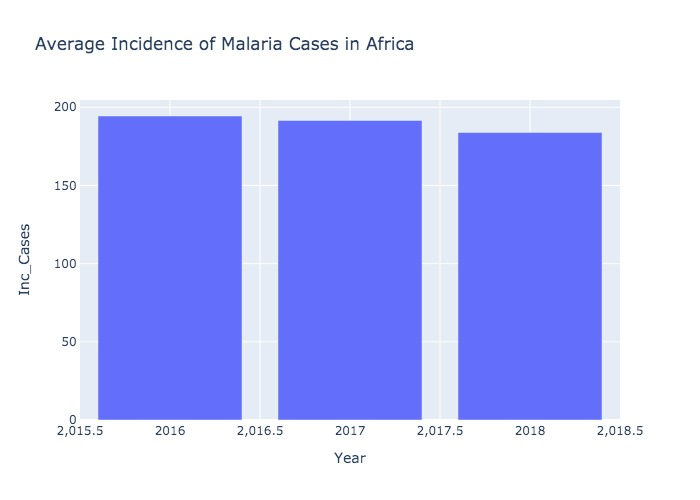

### Insecticide Treated Nets 
Insecticide Treated Nets (ITNs) have been widely distributed in many countries. Below I plot the percentage of a country with 'access to an ITN' (percentage of the population that had been given an ITN in the past) with the incidence rate of malaria within that country. Each dot represents a specific year. Data from only a small number of countries was available. 

With this limited data, the percentage of population with access to an ITN does not seem to scale with the estimated incidence rates within a country. We should remember that the incidence rate is in many countries is estimated using a model, which also uses the prevalence of malaria parasites. These nets may be making a change in malaria cases on the ground but the model used by WHO and the inferred incidence rate might not be complete. If WHO largely uses parasite prevalence to indicate incidence rates in countries with a large gap in healthcare services and reporting, then any methods used to control malaria transmission in humans without effecting the parasites might over estimate numbers. As I have not seen available information on details of the modelling, it is hard to say, especially without errors attached.

If the incidence rates are very accurate, then it could be that not all the ITNs distributed are still in a good condition for use or that everyone with access is actually sleeping under one. Though, I would expect that these number should all scale together, meaning we should still see a correlation below, which we don't. More data and detailed information on modelling is needed here.

In [20]:
#Insecticide Treated Nets (ITNs)
fig15 = px.scatter(Funding_ITN, x='Pop_Perc_ITN', y='Inc_Cases', 
                  title='ITN impact on Incidence of Malaria')
fig15.write_image('Figures/scatter/ITN_Inc.jpg')

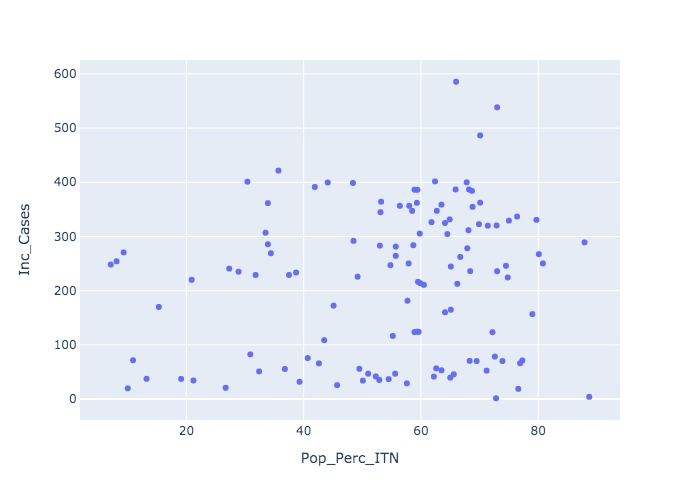

## Weather Factors
As mosquitoes need shallow water such as puddles and reservoirs to breed, I was interested in how weather conditions, such as rainfall and cloud cover, could compare with the incidence of malaria seen in different countries. I also wondered if mosquito activity changes depending on local weather conditions and if so, would this show up in the incidence rates within a country. 

The figures below compare a range of weather conditions with the incidence rate of malaria. The data included daily conditions such as maximum temperature and precipitation recorded for that day at different locations and averaged for the country. I then averaged these conditions over each year and compared them with the yearly incidence rate of malaria for each country. Data was used from *Berkeley Earth* and *World Weather Online*. *Berkeley Earth* data on global temperatures is recorded temperature data, whereas *World Weather Online* uses historical forecast data. Berkeley Earth has data available between 2000 and 2013 and *World Weather Online* has available data from July 2008 onwards. To cross check the recorded and forecast datasets, I compared the average temperature data from the two organisations below, with both plots being similar. 

When performing a regression analysis on the data, I found no strong correlation between weather conditions such as humidity, temperature and cloud cover and the estimated incidence rate of malaria transmission in African countries. Without errors and details of the modelling done by WHO, it is hard to say for sure if these conditions play a role.

In [68]:
#Berkeley Earth Temperature (as cross check)
fig10=px.scatter(temp_df_allyears, x='AverageTemperature', y='Malaria_Cases_Year', color='Year',
                title='Temperature against Incidence Rate of Malaria in African Countries',
                labels={'Malaria_Cases_Year':'Malaria Incidence (per 1000 population at risk)',
                       'AverageTemperature':'Average Temperature'})
fig10.write_image('Figures/scatter/BerkeleyEarth_Temperature_Year.jpg')

fig10a=px.scatter(temp_df_allyears, x='AverageTemperature', y='Malaria_Cases_Year', color='Country',
                title='Temperature against Incidence Rate of Malaria in African Countries',
                labels={'Malaria_Cases_Year':'Malaria Incidence (per 1000 population at risk)',
                       'AverageTemperature':'Average Temperature'})
fig10a.write_image('Figures/scatter/BerkeleyEarth_Temperature_Country.jpg')

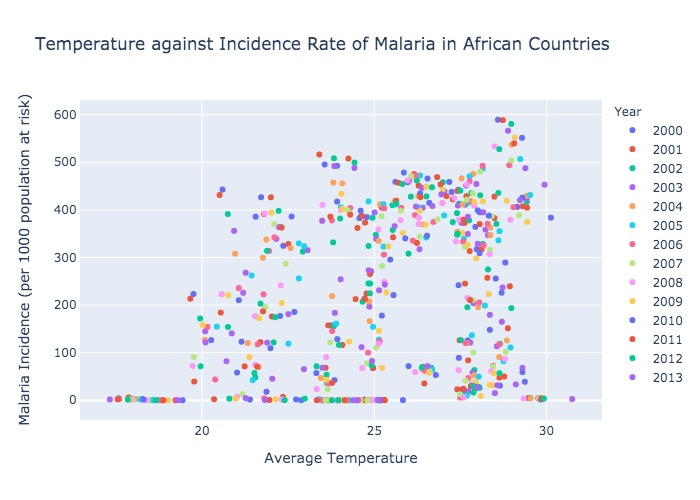

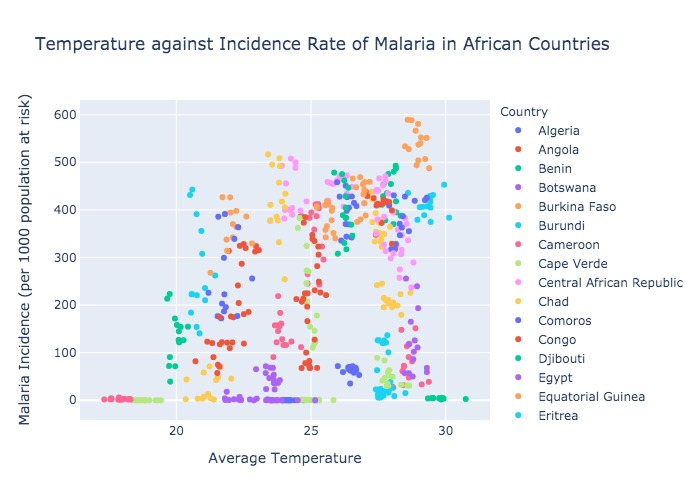

The *World Weather Online* has forecast data on multiple weather conditions. The plots below show how the averaged daily precipitation, humidity, cloud cover, pressure as well as maximum, minimum and average temperatures over the year compares with the incidence rate found in African countries. Differences in average daily temperatures between the above and below plots are most likely from differences in forecast data and measured values.

In [82]:
#Weather Features (World Weather Online)
for name in WWO_Final_columns[2:9]:
    fig11=px.scatter(WWO_df, x=name, y='Inc_Cases', color='Year', 
                title='{} against Incidence Rate of Malaria in African Countries'.format(name),
                labels={'Inc_Cases':'Malaria Incidence (per 1000 population at risk)'})
    fig11.write_image('Figures/scatter/{}.jpg'.format(name))

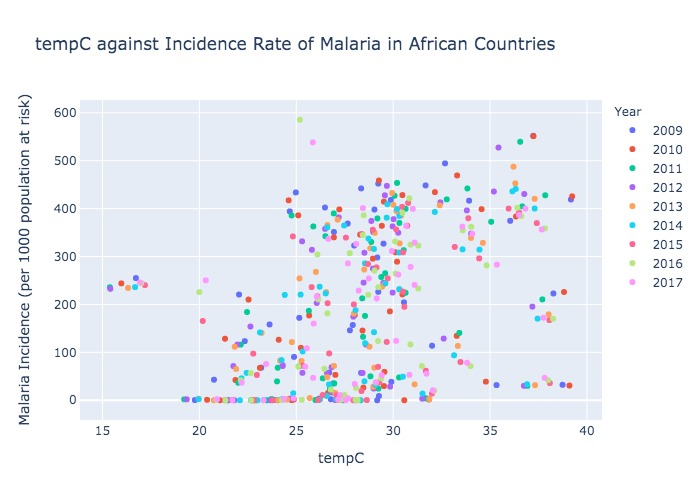

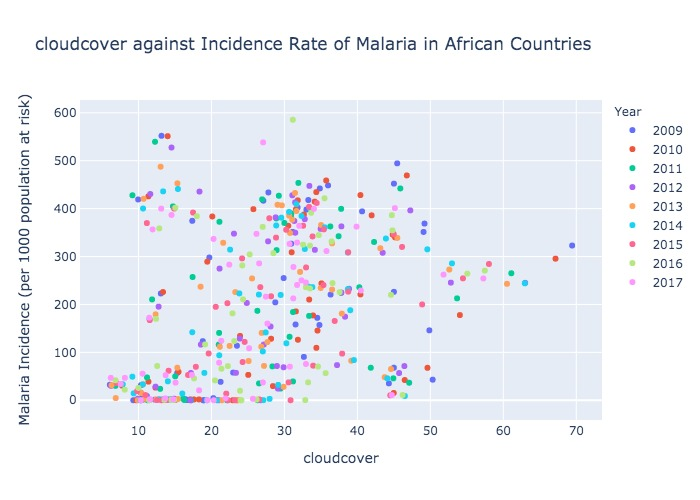

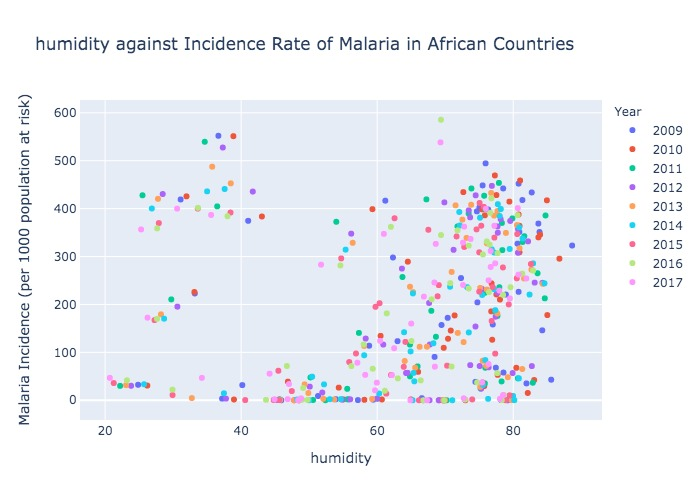

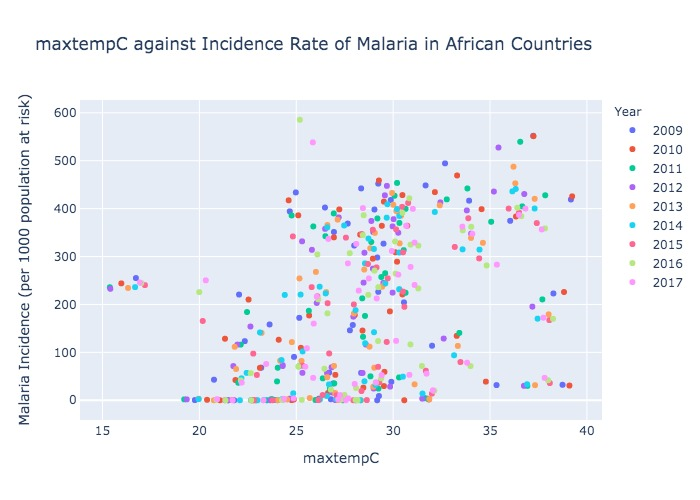

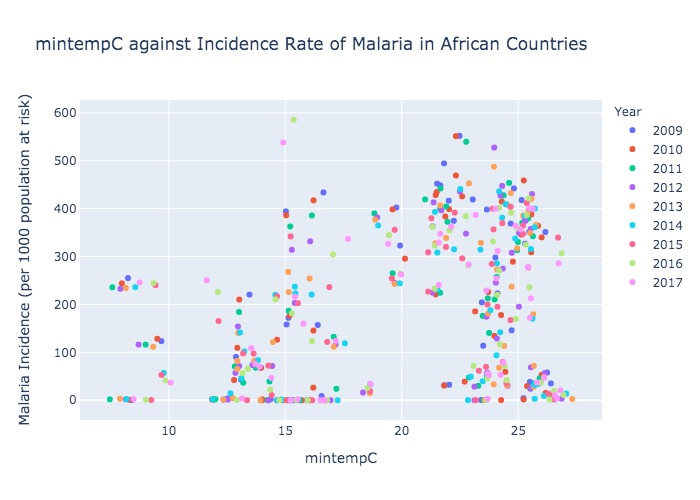

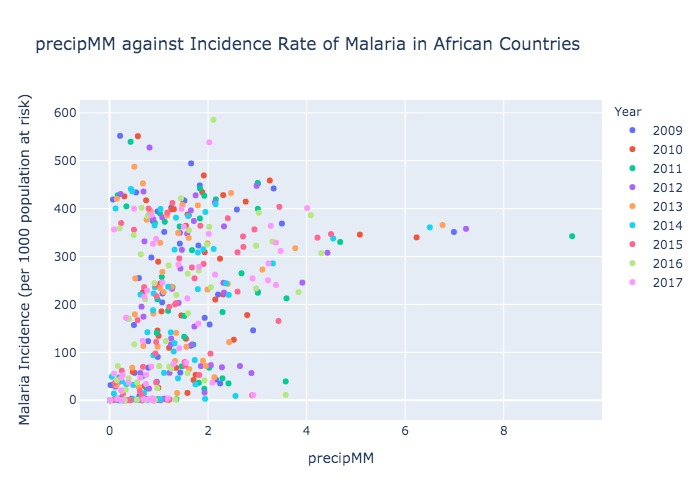

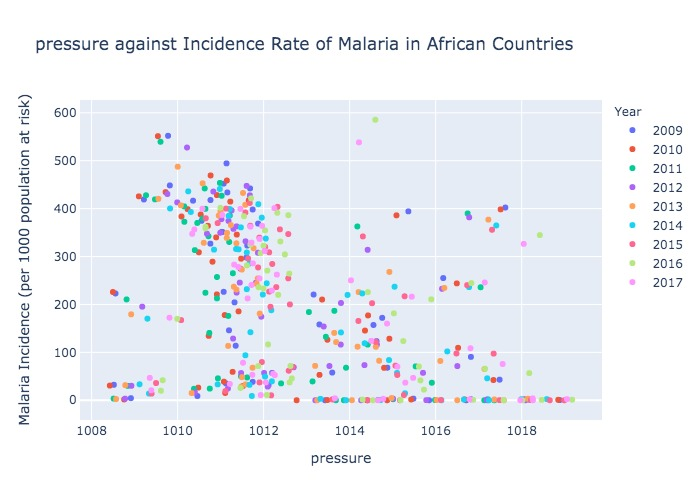

If we take the data at face value, however, then this suggests other factors play a more important role in the transmission of malaria. Controlling the data for parasite prevalence in African countries might be useful. Comparing countries with a similar rate of parasite prevalence but having varying numbers of cases could reveal where the most important differences lie in fighting the disease. 

Factors that could also be interesting to look into in the future could be pesticide spraying, urban land development, percentage of land covered with water reservoirs, average age of the population, GDP and types of mosquitoes present.